# Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<b>About the data:</b>  

Let’s consider a Company dataset with around 10 variables and 400 records.  

<b>The attributes are as follows: </b> 

 <b>Sales</b> -- Unit sales (in thousands) at each location 

 <b>Competitor Price</b> -- Price charged by competitor at each location 

 <b>Income</b> -- Community income level (in thousands of dollars) 

 <b>Advertising</b> -- Local advertising budget for company at each location (in thousands of dollars) 

 <b>Population</b> -- Population size in region (in thousands) 

 <b>Price</b> -- Price company charges for car seats at each site 

 <b>Shelf Location at stores</b> -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site 

 <b>Age</b> -- Average age of the local population 

 <b>Education</b> -- Education level at each location 

 <b>Urban</b> -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location 

 <b>US</b> -- A factor with levels No and Yes to indicate whether the store is in the US or not 


In [4]:
company.shape

(400, 11)

In [5]:
company.size

4400

In [6]:
#Descriptive Statistics
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
#Checking for null values
company.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [9]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no null values

In [10]:
#Checking duplicate values
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [11]:
company.duplicated().sum()

0

There are no duplicate values

In [12]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

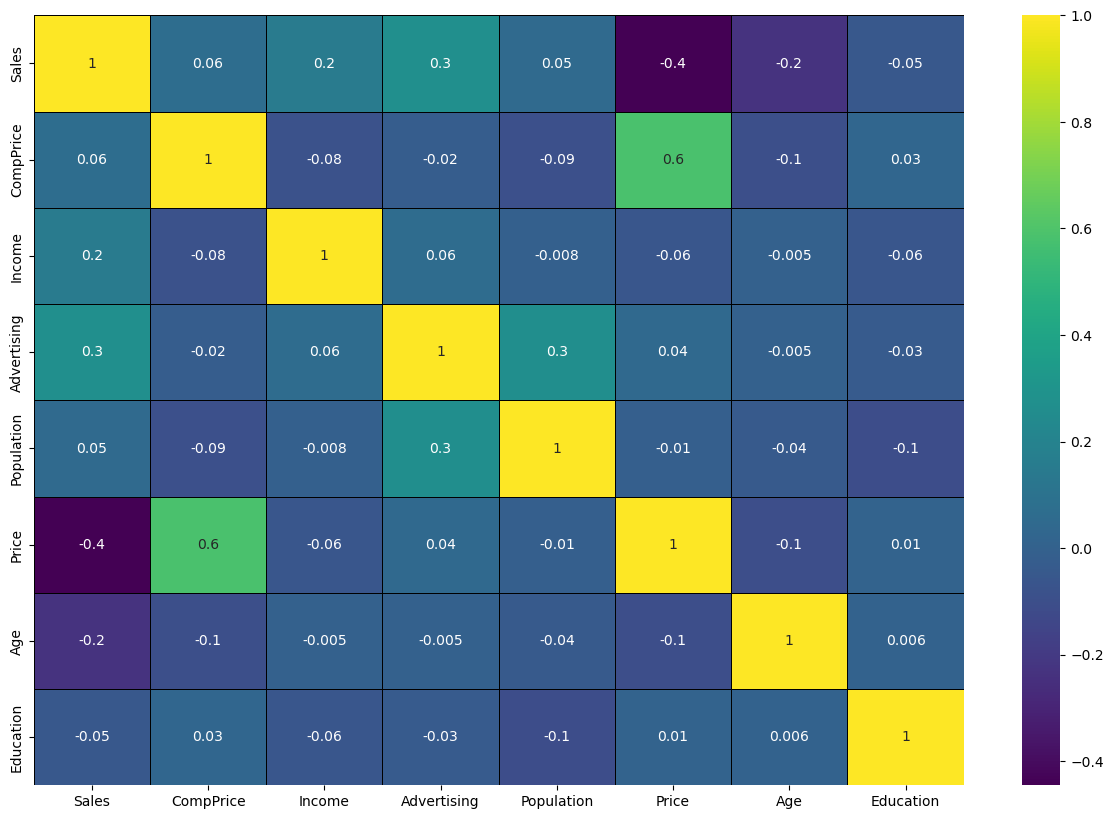

In [13]:
#Visualizing Correlation with heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(company.corr(), annot=True, fmt = '.1g', cmap='viridis', cbar="False", linecolor='black', linewidths=0.5)

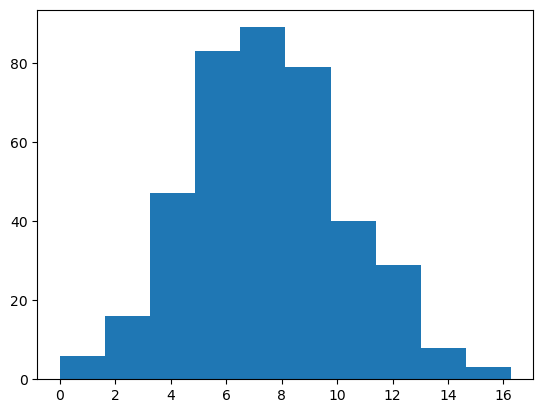

In [14]:
plt.hist(company['Sales'])
plt.show()

## As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales
### For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”
### and For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [15]:
company['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [16]:
df = company.copy()
df['Sales_cat'] = pd.cut(x=df['Sales'], bins=[0,5.39,9.32,17], labels=['Low', 'Medium','High'], right=False)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [17]:
df.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [19]:
categorical_features =df.describe(include=['object','category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [20]:
numerical_features = df.describe(include = ['int64','float64']).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


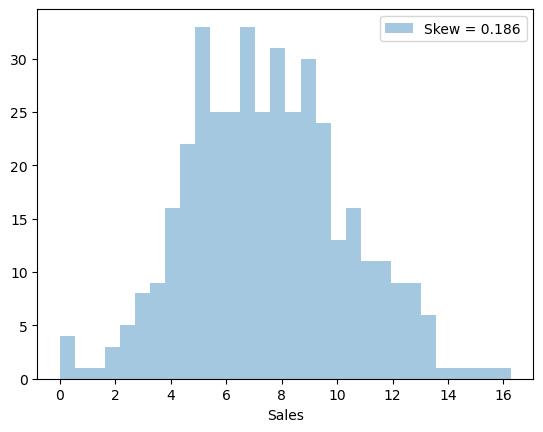

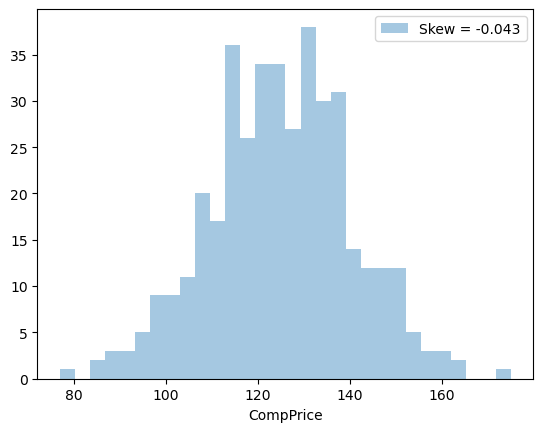

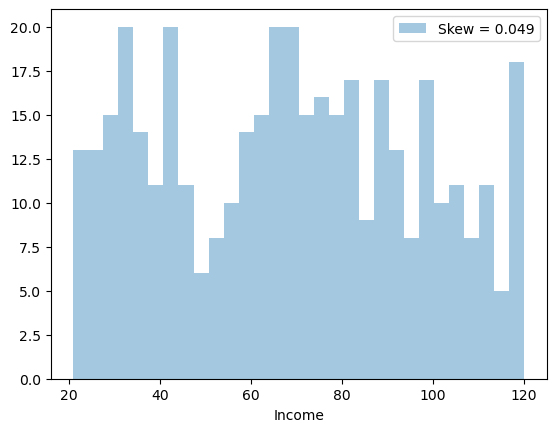

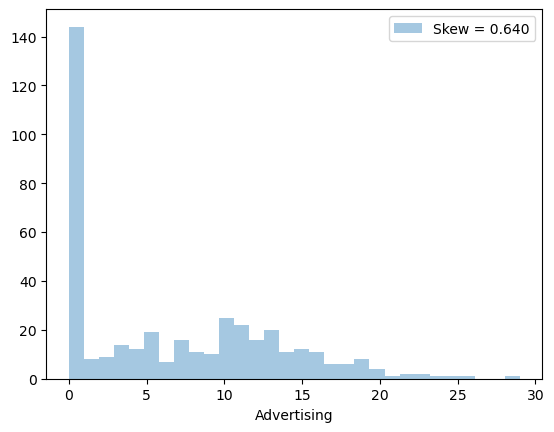

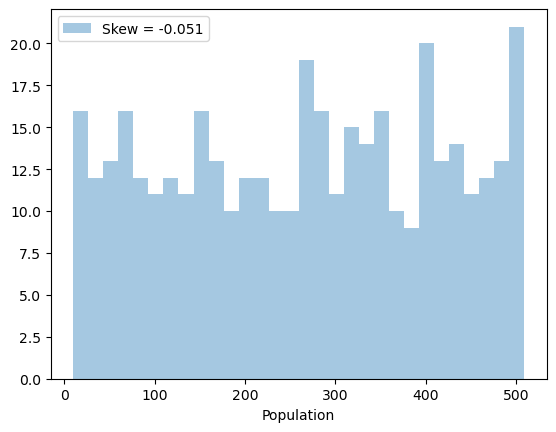

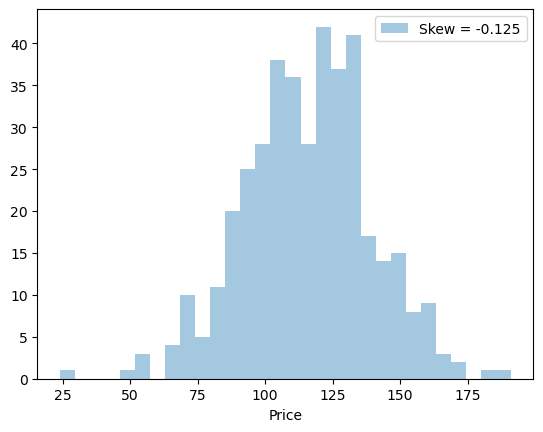

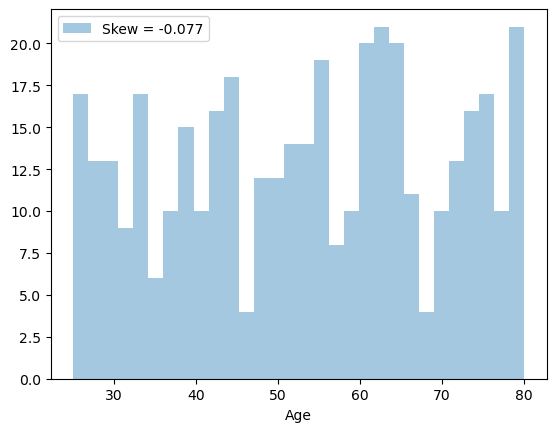

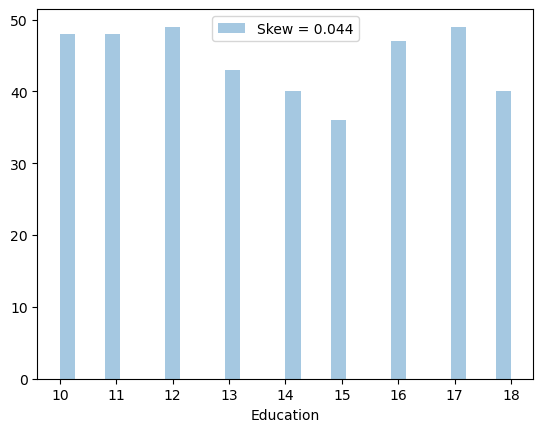

In [21]:
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

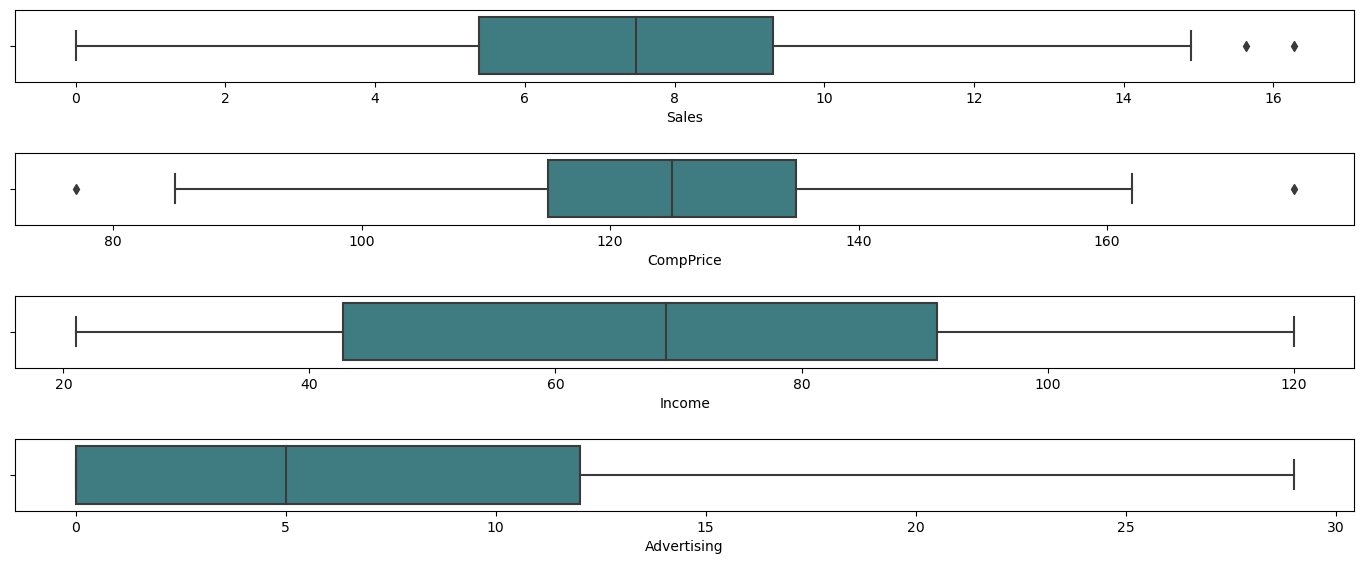

In [22]:
#Checking for Outliers with boxplot
figure, axes = plt.subplots(4,1, figsize=(14,6))
sns.boxplot(x='Sales', data=df, palette ='crest', ax=axes[0])
sns.boxplot(x='CompPrice', data=df, palette ='crest', ax=axes[1])
sns.boxplot(x='Income', data=df, palette ='crest', ax=axes[2])
sns.boxplot(x='Advertising', data=df, palette ='crest', ax=axes[3])
plt.tight_layout(pad=2.0)

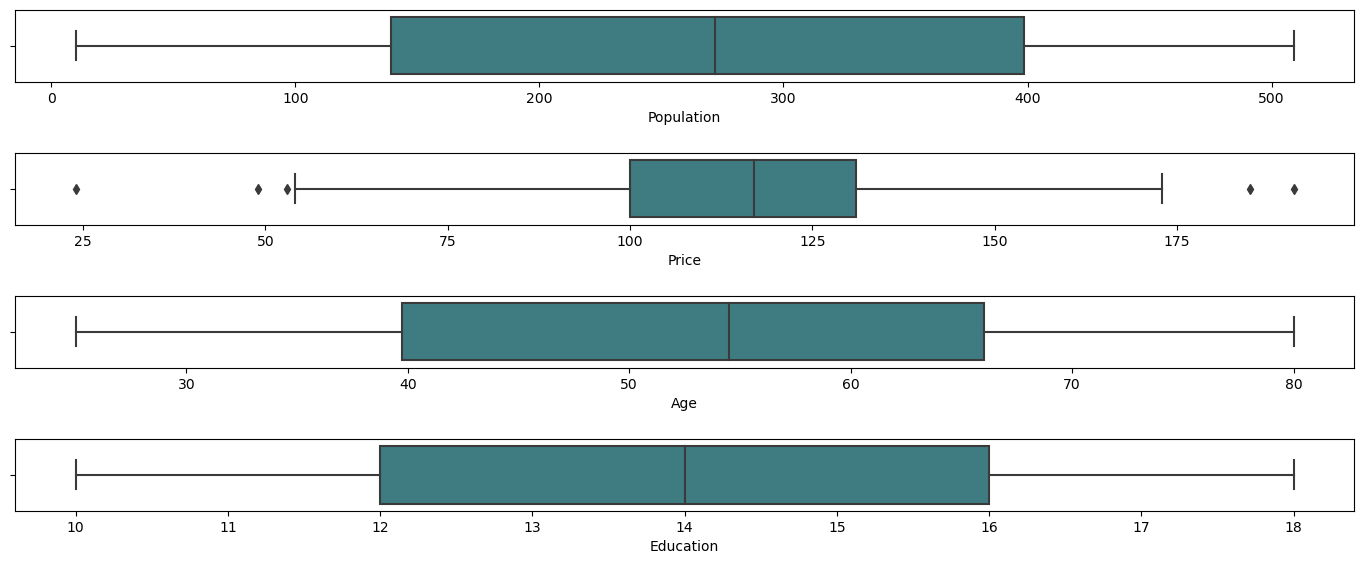

In [23]:
figure, axes = plt.subplots(4,1, figsize=(14,6))
sns.boxplot(x='Population', data=df, palette ='crest', ax=axes[0])
sns.boxplot(x='Price', data=df, palette ='crest', ax=axes[1])
sns.boxplot(x='Age', data=df, palette ='crest', ax=axes[2])
sns.boxplot(x='Education', data=df, palette ='crest', ax=axes[3])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

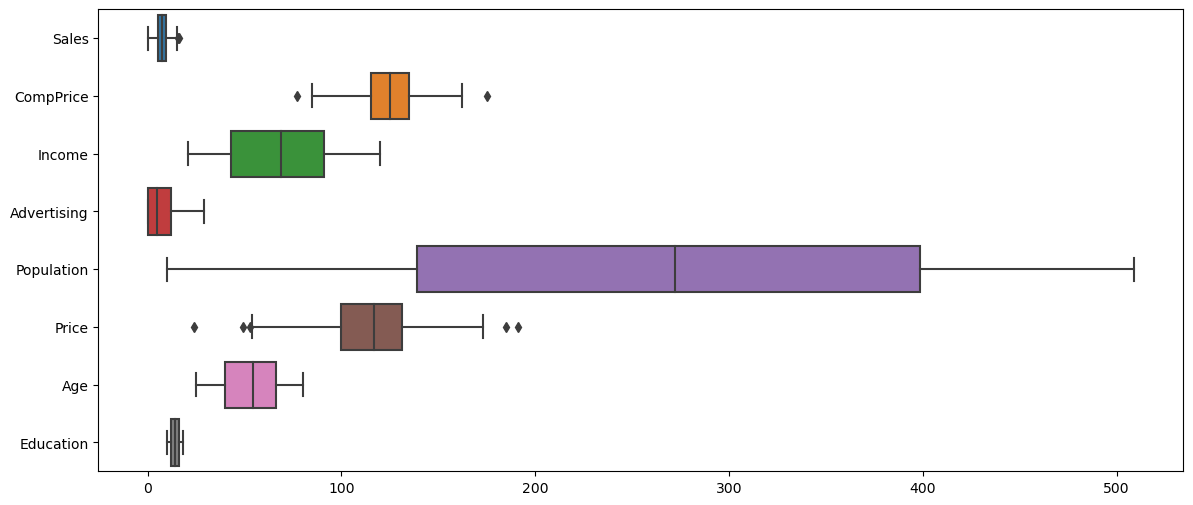

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient='h')

In [25]:
from collections import Counter

In [26]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
    
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)  
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print("The dataset contains %d observations with more than 2 outliers" %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 0 observations with more than 2 outliers


<Figure size 800x800 with 0 Axes>

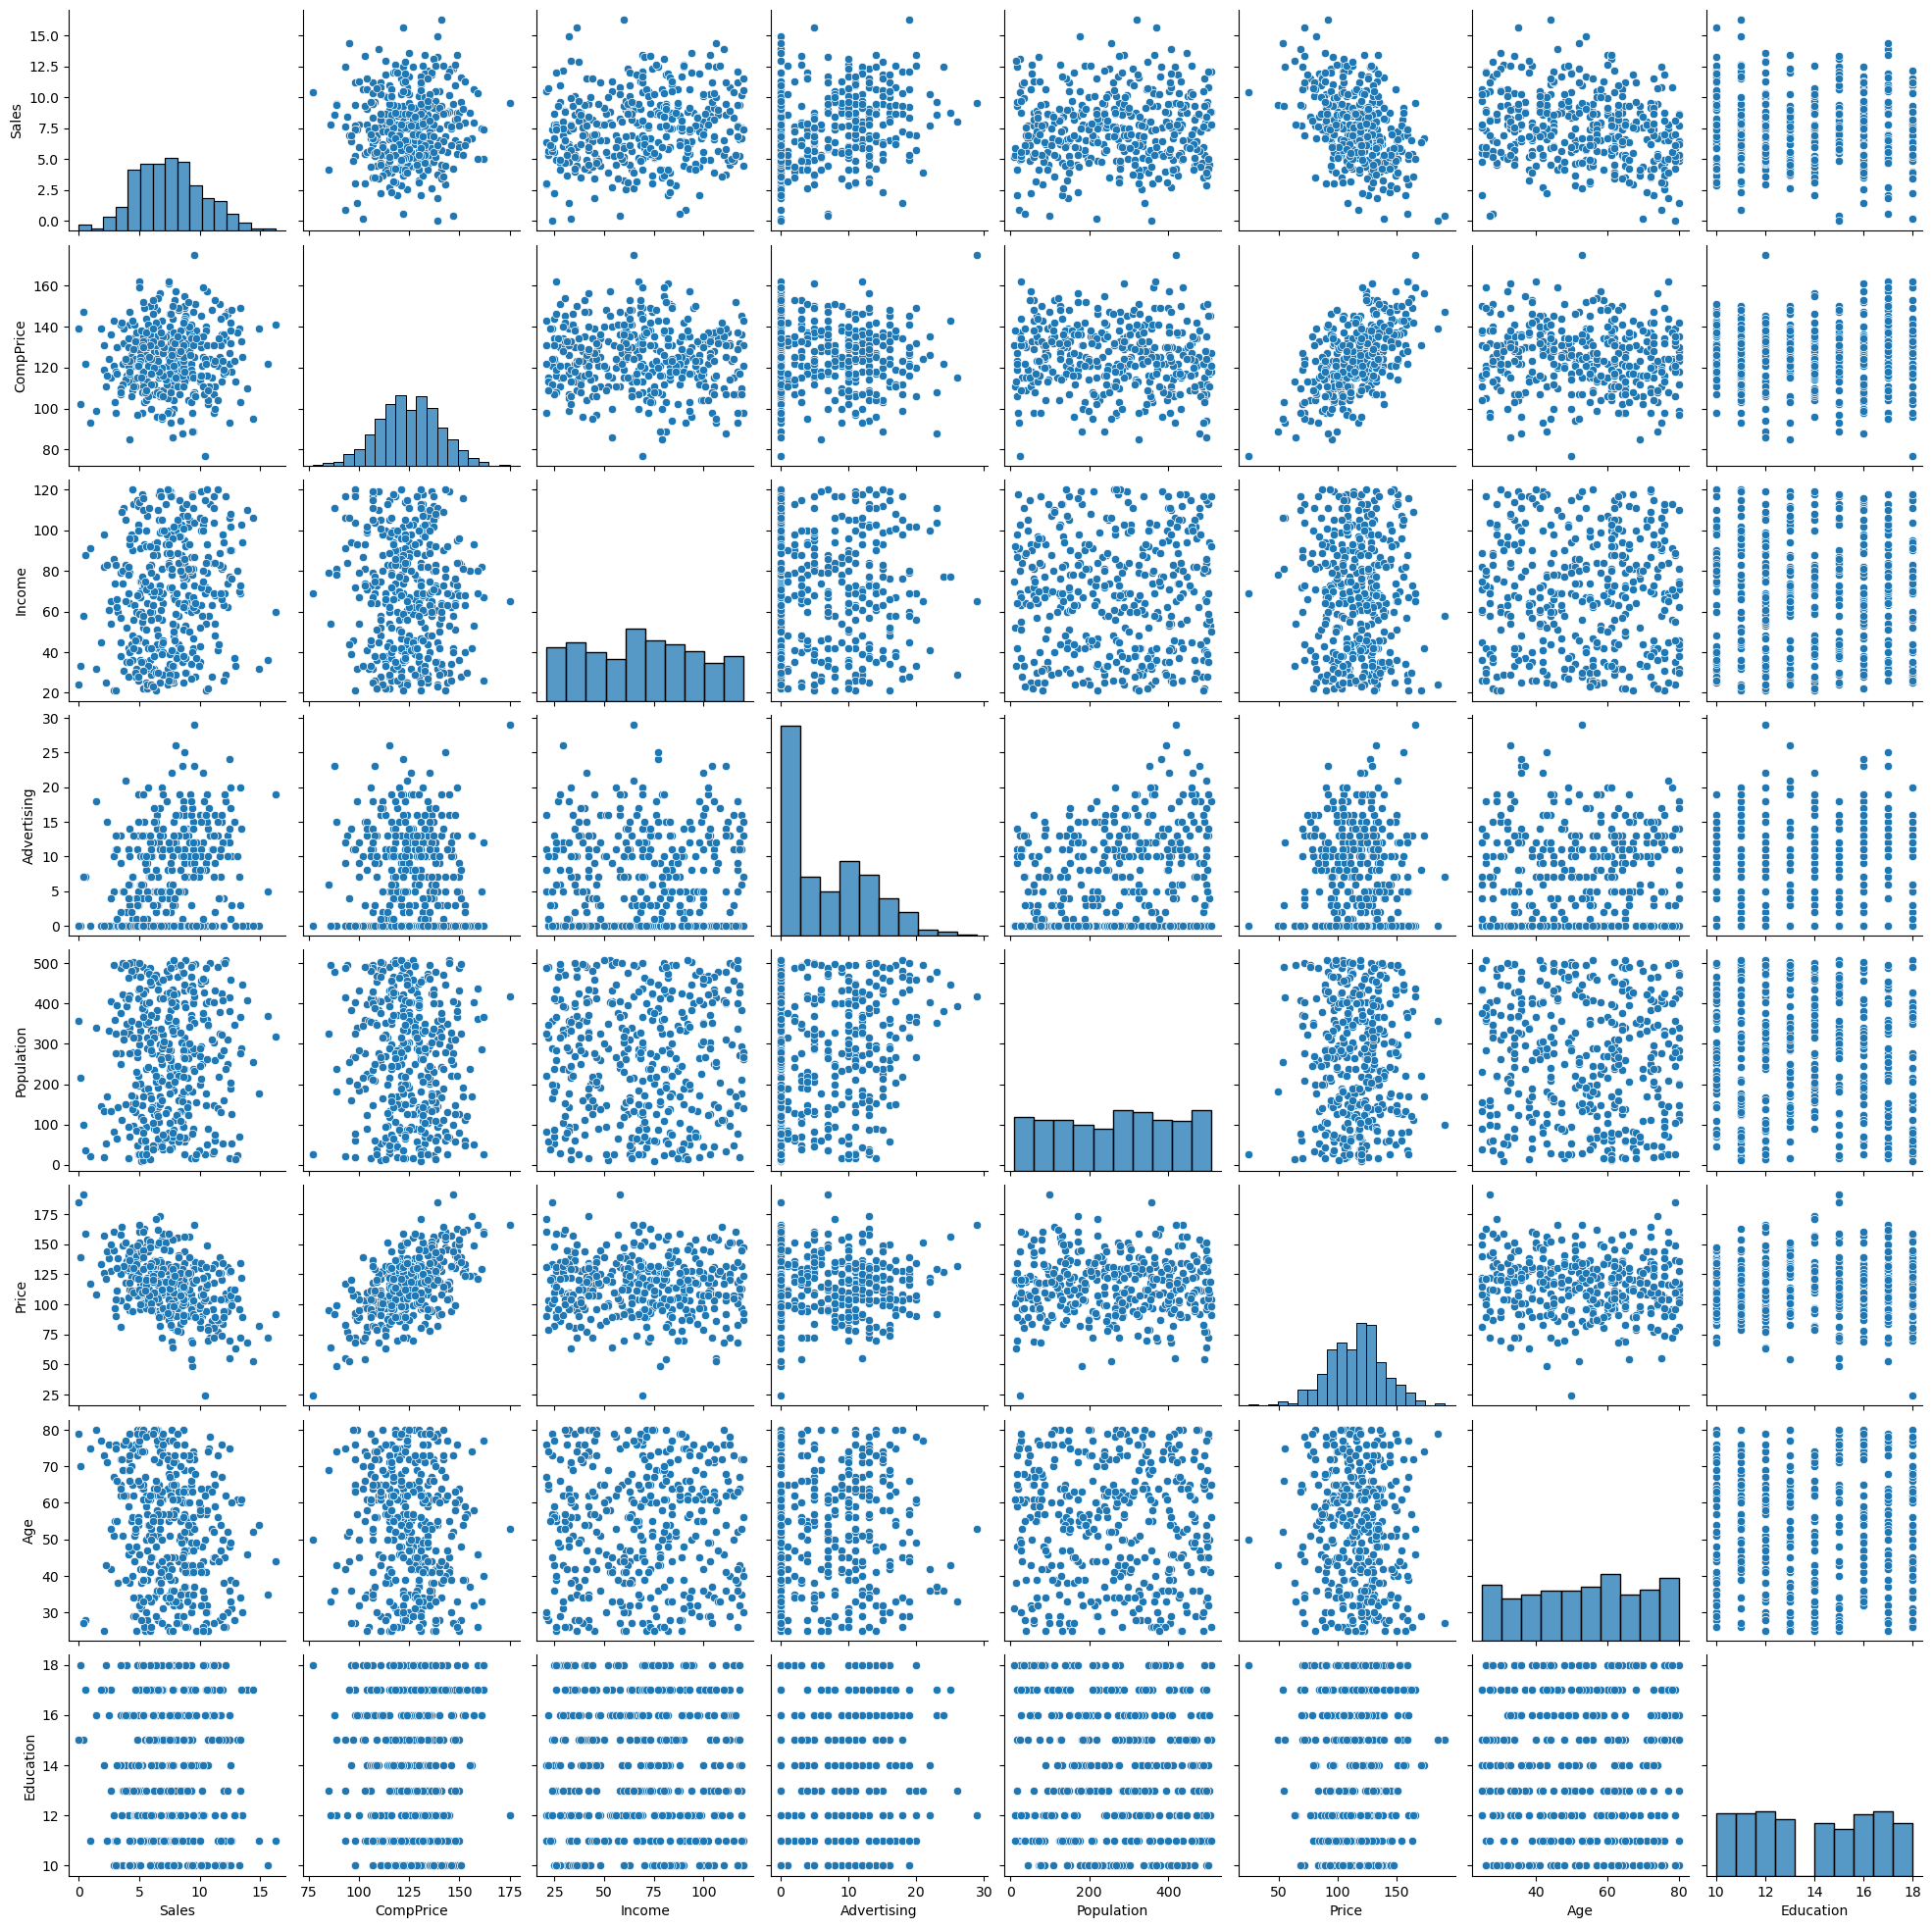

In [27]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


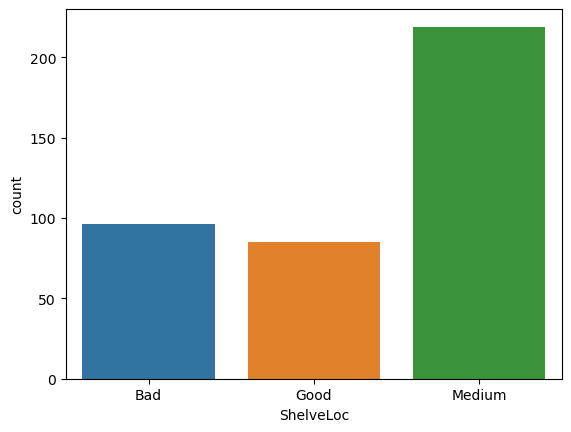

In [28]:
#Countplots for the categorical column
sns.countplot(df['ShelveLoc'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


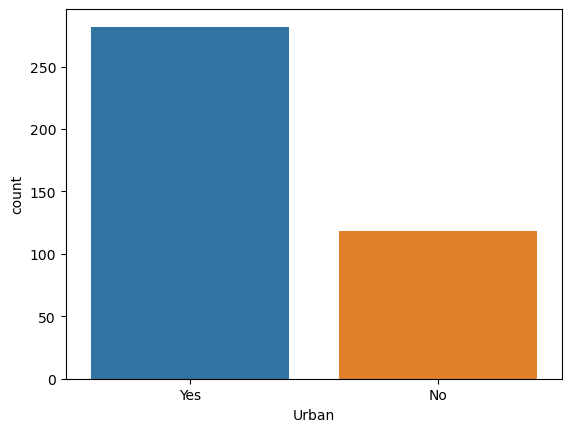

In [29]:
sns.countplot(df['Urban'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


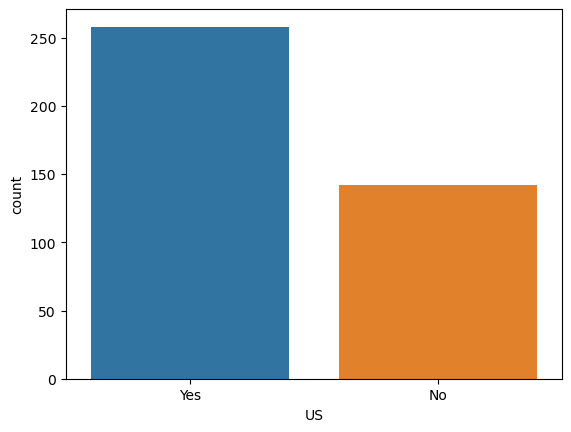

In [30]:
sns.countplot(df['US'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


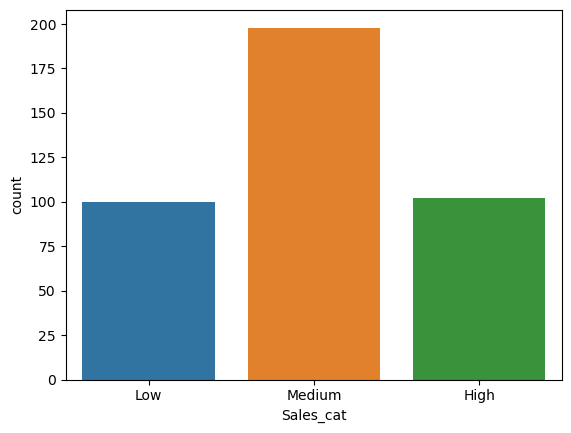

In [31]:
sns.countplot(df['Sales_cat'])
plt.show()

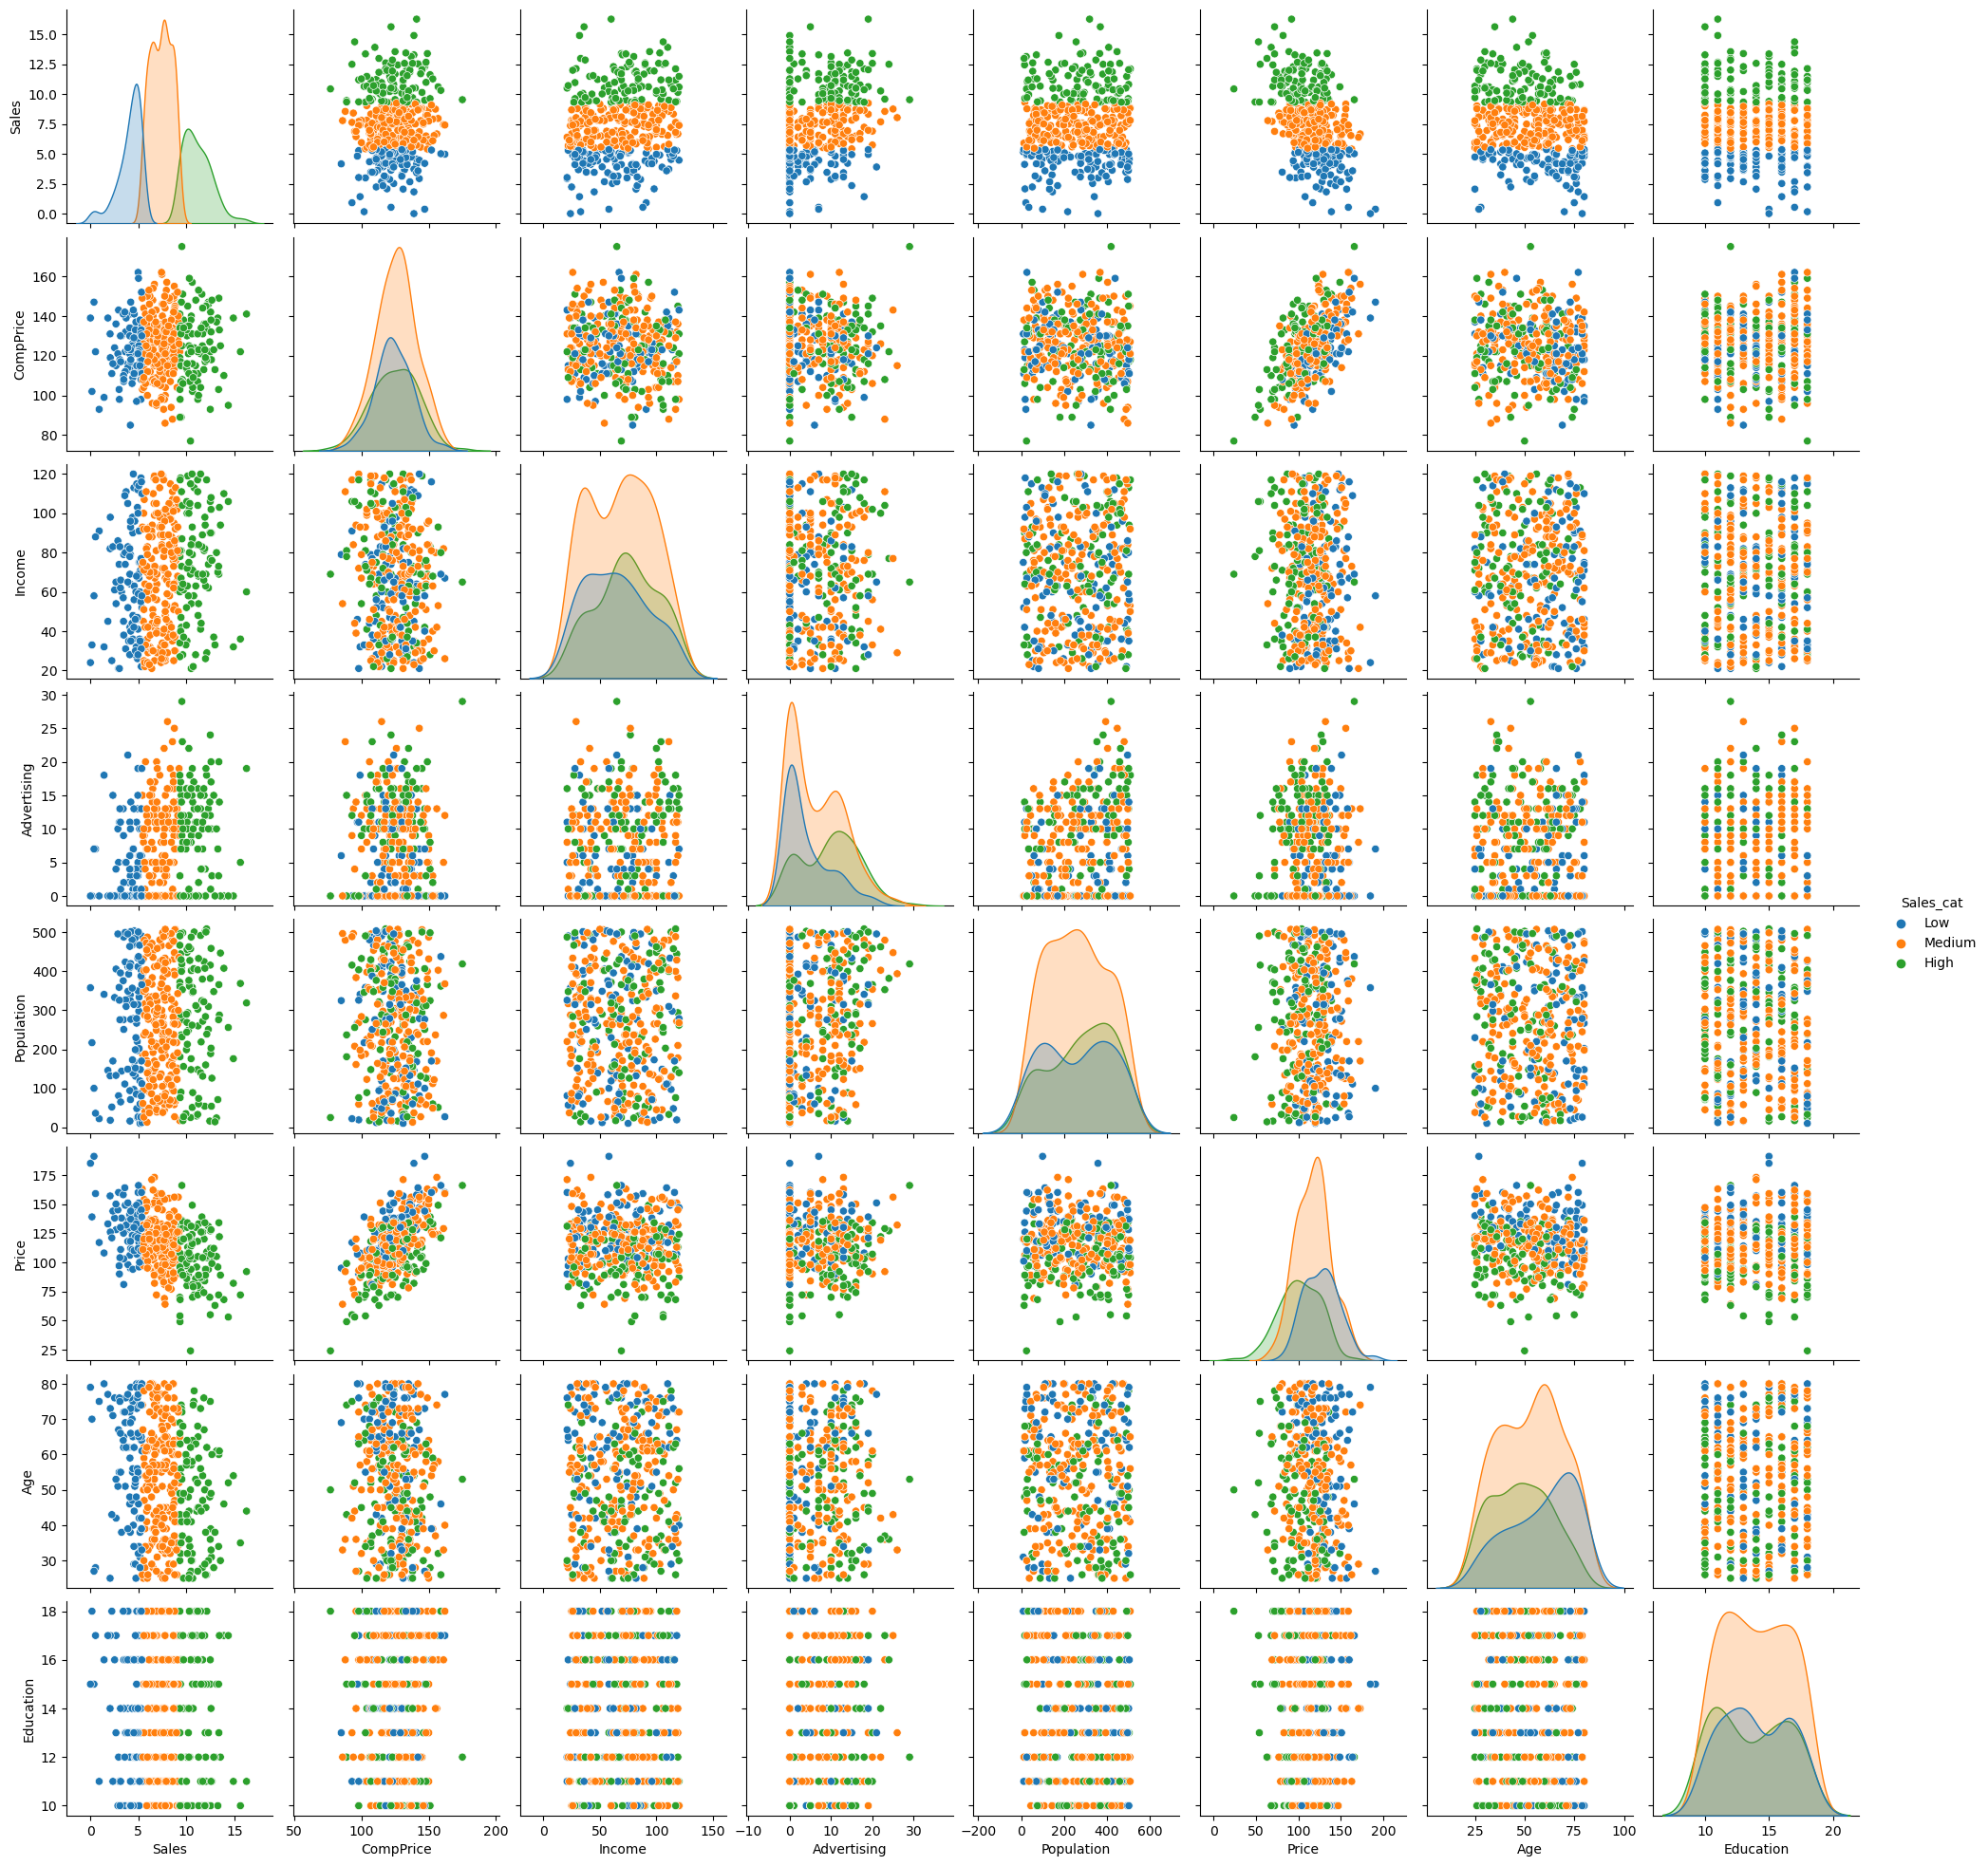

In [32]:
sns.pairplot(df, hue= 'Sales_cat')

# Data Preprocessing

In [33]:
data = df.copy()

In [34]:
data.drop('Sales', axis=1, inplace=True)

In [35]:
data = pd.get_dummies(data.iloc[:,:-1])

In [36]:
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [37]:
data['Sales'] = df.Sales_cat

In [38]:
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
le.fit(data['Sales'])
data['Sales'] = le.transform(data['Sales'])
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [42]:
#Splitting into Input and output variables
X = data.iloc[:,:-1].values
Y = data.Sales.values

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [45]:
x_train

array([[125,  94,   0, ...,   1,   1,   0],
       [107, 105,  18, ...,   1,   0,   1],
       [122,  26,   0, ...,   0,   1,   0],
       ...,
       [132,  33,   7, ...,   0,   0,   1],
       [130,  37,  13, ...,   0,   0,   1],
       [135,  69,  14, ...,   1,   0,   1]], dtype=int64)

In [46]:
x_test

array([[114,  83,   0, ...,   1,   1,   0],
       [133,  82,   0, ...,   1,   1,   0],
       [125,  62,  14, ...,   1,   0,   1],
       ...,
       [162,  26,  12, ...,   1,   0,   1],
       [132, 107,   0, ...,   0,   1,   0],
       [133,  97,   0, ...,   1,   1,   0]], dtype=int64)

In [47]:
y_train

array([0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2])

In [48]:
y_test

array([1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2,
       0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0,
       0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 2, 2])

# Bagging Decision Tree

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator= cart, n_estimators= 2000, random_state=7)
results = cross_val_score(model, x_train, y_train, cv = kfold)
print(results.mean())

0.6642857142857144


# AdaBoost Classification

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = AdaBoostClassifier(n_estimators=10, random_state = 7)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.6178571428571429


# Staking Ensemble estimators

In [53]:
# Stacking Ensemble estimators for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [54]:
kfold = KFold(n_splits=10, random_state= 7, shuffle=True)

In [55]:
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [56]:
#Create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.6964285714285714


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Algorithm

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='gini', random_state= 42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.6607142857142858


In [59]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='entropy', random_state= 42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.6464285714285715


# Testing Random Forest Algorithm

In [60]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='gini', random_state= 42)

In [61]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=1000, random_state=42)

In [62]:
predictions = model.predict(x_test)

In [63]:
np.mean(y_test==predictions)

0.6166666666666667

In [64]:
pd.crosstab(y_test, predictions)

col_0,0,1,2
row_0,,,
0,17,0,14
1,0,16,14
2,10,8,41
